In [700]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [701]:
df_train = pd.read_csv('train_u6lujuX_CVtuZ9i.csv') 
df_test = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')

In [702]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [703]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [704]:
df_train.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002361,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [705]:
(df_train.isnull().sum(axis=0)*100/len(df_train)).sort_values(ascending=False)

Credit_History       8.143322
Self_Employed        5.211726
LoanAmount           3.583062
Dependents           2.442997
Loan_Amount_Term     2.280130
Gender               2.117264
Married              0.488599
Loan_Status          0.000000
Property_Area        0.000000
CoapplicantIncome    0.000000
ApplicantIncome      0.000000
Education            0.000000
Loan_ID              0.000000
dtype: float64

In [706]:
df_train.Credit_History.value_counts(normalize=True)

1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64

In [707]:
df_train.Credit_History.fillna(value=df_train.Credit_History.mode()[0],inplace=True)

In [708]:
df_train.Self_Employed.value_counts(normalize=True)

No     0.859107
Yes    0.140893
Name: Self_Employed, dtype: float64

In [709]:
df_train.Self_Employed.fillna(value=df_train.Self_Employed.mode()[0],inplace=True)

In [710]:
df_train.Dependents.value_counts(normalize=True)

0     0.575960
1     0.170284
2     0.168614
3+    0.085142
Name: Dependents, dtype: float64

In [711]:
#Here in case of na values in dependents we are going to delete rows containing Dependents as NAs.
df_train = df_train[~df_train.Dependents.isnull()]
df_train.shape

(599, 13)

In [712]:
len(df_train.Loan_Amount_Term.unique())
df_train.Loan_Amount_Term.value_counts(normalize=True)

360.0    0.856655
180.0    0.073379
480.0    0.022184
300.0    0.022184
84.0     0.006826
240.0    0.005119
120.0    0.005119
36.0     0.003413
60.0     0.003413
12.0     0.001706
Name: Loan_Amount_Term, dtype: float64

In [713]:
df_train.Loan_Amount_Term.fillna(value=df_train.Loan_Amount_Term.mode()[0],inplace=True)

In [714]:
df_train.Gender.fillna(value=df_train.Gender.mode()[0],inplace=True)

In [715]:
round((df_train.isnull().sum(axis=0)/len(df_train))*100,2)

Loan_ID              0.00
Gender               0.00
Married              0.00
Dependents           0.00
Education            0.00
Self_Employed        0.00
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           3.34
Loan_Amount_Term     0.00
Credit_History       0.00
Property_Area        0.00
Loan_Status          0.00
dtype: float64

In [716]:
df_train.LoanAmount.describe()

count    579.000000
mean     146.816926
std       86.343049
min        9.000000
25%      100.000000
50%      128.000000
75%      169.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [717]:
df_train= df_train[~df_train.LoanAmount.isnull()]

In [718]:
df_train.isnull().sum(axis=0)/len(df_train)

Loan_ID              0.0
Gender               0.0
Married              0.0
Dependents           0.0
Education            0.0
Self_Employed        0.0
ApplicantIncome      0.0
CoapplicantIncome    0.0
LoanAmount           0.0
Loan_Amount_Term     0.0
Credit_History       0.0
Property_Area        0.0
Loan_Status          0.0
dtype: float64

In [719]:
df_train.shape

(579, 13)

In [720]:
df = df_train[df_train.ApplicantIncome<=df_train.ApplicantIncome.quantile(0.99)]
df.shape

(573, 13)

In [721]:
df = df[df.CoapplicantIncome <= df.CoapplicantIncome.quantile(0.99)]
df.shape

(567, 13)

In [722]:
df = df[df.LoanAmount <= df.LoanAmount.quantile(0.99)]
df.shape

(562, 13)

In [723]:
df['CombinedIncome'] = df['ApplicantIncome']+df['CoapplicantIncome']

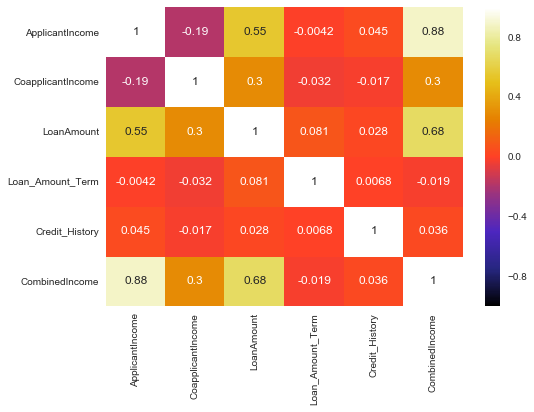

In [724]:
corr = df.corr()
sns.heatmap(corr,cmap='CMRmap',annot=True)
plt.show()

In [725]:
from sklearn.preprocessing import scale

In [726]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,CombinedIncome
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0


In [727]:
df = df[df.CombinedIncome <= df.CombinedIncome.quantile(0.99)]
df.shape

(556, 14)

In [728]:
df['Loan_Status'] = df['Loan_Status'].astype('category')

In [729]:
df['Loan_Status'].astype('category')

1      N
2      Y
3      Y
4      Y
5      Y
6      Y
7      N
8      Y
10     Y
11     Y
12     Y
13     N
14     Y
15     Y
16     Y
17     N
18     N
19     Y
20     N
21     Y
22     N
23     N
24     N
25     Y
26     Y
27     Y
28     N
29     Y
30     N
31     N
      ..
579    Y
580    Y
582    Y
583    N
584    N
585    N
586    Y
587    Y
588    Y
589    N
590    Y
591    N
592    Y
593    Y
594    Y
595    Y
596    N
598    Y
599    Y
601    Y
602    Y
603    Y
606    Y
607    Y
608    Y
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 556, dtype: category
Categories (2, object): [N, Y]

In [730]:
import pandas as pd
Gen = pd.get_dummies(df.Gender)
Gen = Gen['Female']
Gen = Gen.to_frame()
Gen.columns = ['Gender']


In [731]:
Mar= pd.get_dummies(df.Married)
Mar = Mar['Yes']
Mar = Mar.to_frame()
Mar.columns = ['Married']

In [732]:
Dep = pd.get_dummies(df.Dependents)
Dep_0 = Dep['0']
Dep_1 = Dep['1']
Dep_2 = Dep['2']
import pandas as pd
Dep = pd.concat((Dep_0, Dep_1, Dep_2), axis=1)


In [733]:
Edu= pd.get_dummies(df.Education)
Edu = Edu['Graduate']
Edu = Edu.to_frame()

In [734]:
SE= pd.get_dummies(df.Self_Employed)
SE = SE['Yes']
SE = SE.to_frame()
SE.columns = ['SE']

In [735]:
from sklearn.preprocessing import scale
ComInc = scale(df.CombinedIncome)
ComInc = pd.DataFrame(ComInc)
ComInc.columns = ['CI']

In [736]:
LA = scale(df.LoanAmount)
LA = pd.DataFrame(LA)
LA.columns = ['LA']

In [737]:
LAT = scale(df.Loan_Amount_Term)
LAT = pd.DataFrame(LAT)
LAT.columns = ['LAT']

In [738]:
CH = df.Credit_History
CH = CH.to_frame()
CH.columns = ['CH']

In [739]:
PA = df[['Property_Area']]
PA[df.Property_Area == 'Rural'] = 0
PA[df.Property_Area == 'Semiurban'] = 1
PA[df.Property_Area == 'Urban'] = 2

PA = pd.get_dummies(PA)
PA = pd.concat((PA.Property_Area_0, PA.Property_Area_1),axis = 1)
PA.columns = ['Rural','SemiUrban']

C:\Users\Administrator\Desktop\Python\New folder\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Administrator\Desktop\Python\New folder\lib\site-packages\pandas\core\frame.py:2444: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer(indexer, value)
C:\Users\Administrator\Desktop\Python\New folder\lib\site-packages\pandas\core\frame.py:2424: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.

In [740]:
X = pd.concat((Gen.reset_index(drop=True), Mar.reset_index(drop=True), Dep.reset_index(drop=True), Edu.reset_index(drop=True), SE.reset_index(drop=True), ComInc.reset_index(drop=True), LA.reset_index(drop=True), LAT.reset_index(drop=True), CH.reset_index(drop=True), PA.reset_index(drop=True)),axis=1)

In [741]:
y = []

In [742]:
X = np.array(X)
np.shape(X)

(556, 13)

In [743]:
LS = df[['Loan_Status']]
y = LS
y.shape

(556, 1)

In [744]:
print(X.shape,y.shape)

(556, 13) (556, 1)


In [745]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

In [746]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [747]:
knn.fit(X, y)

C:\Users\Administrator\Desktop\Python\New folder\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [748]:
pred_y = knn.predict(X)

In [749]:
trainingmodelscore = knn.score(X, y)
trainingmodelscore

0.82194244604316546

In [750]:
pred_y = knn.predict(X)
model_score = knn.score(X,y)
print(model_score)

0.821942446043


C:\Users\Administrator\Desktop\Python\New folder\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


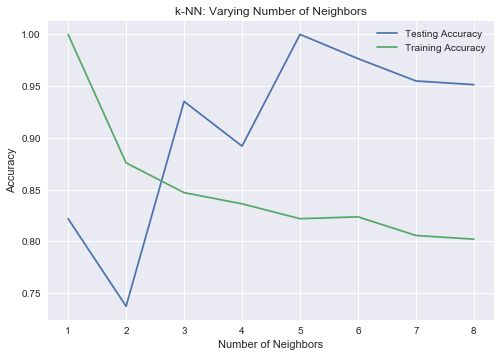

In [751]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))  
test_accuracy = np.empty(len(neighbors))


for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y) 
    train_accuracy[i] = knn.score(X,y)
    test_accuracy[i] = knn.score(X, pred_y)

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


from the above graph we can say that k= 3 will be a good value for the data as bias and variance are optimum at the point

In [752]:
from sklearn.neighbors import KNeighborsClassifier
knn3 = KNeighborsClassifier(n_neighbors = 3)

In [753]:
knn3

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [754]:
knn3.fit(X, y)

C:\Users\Administrator\Desktop\Python\New folder\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [755]:
pred3_y = knn3.predict(X)

In [756]:
model3score = knn3.score(X, y)
model3score

0.84712230215827333

In [757]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, pred3_y))

[[ 95  70]
 [ 15 376]]


In [758]:
from sklearn import metrics
print(metrics.classification_report(y,pred3_y))

             precision    recall  f1-score   support

          N       0.86      0.58      0.69       165
          Y       0.84      0.96      0.90       391

avg / total       0.85      0.85      0.84       556



now we will try to optimize the sensitivity, specificity and accuracy of the model

In [759]:
#sensitivity is the true positive rate (tp/(tp+fn))
sensitivity = 376/(376+15)
sensitivity

0.9616368286445013

In [760]:
#specificity is the true negative rate (tn/(tn+fp))
specificity = 95/(95+70)
specificity

0.5757575757575758

In [761]:
accuracy = (95+376)/(95+376+70+15)
accuracy

0.8471223021582733

In [762]:
prob = knn3.predict_proba(X)
prob

array([[ 0.33333333,  0.66666667],
       [ 0.        ,  1.        ],
       [ 0.        ,  1.        ],
       ..., 
       [ 0.33333333,  0.66666667],
       [ 0.        ,  1.        ],
       [ 1.        ,  0.        ]])

In [763]:
probN = prob[:,0]

In [764]:
for i in enumerate(np.linspace(0.2,0.8,400,True)):
    def pred(i):
        return['N' if k>=i else 'Y' for k in probN]

In [765]:
for i in enumerate(np.linspace(0.2,0.8,400,True)):
    def CM(i):
        return[confusion_matrix(y, pred(i))]

In [766]:
for i in enumerate(np.linspace(0.2,0.8,400,True)):
    def accuracy(i):
        return[(CM(i)[0][0][0]+CM(i)[0][1][1])/(CM(i)[0][0][0]+CM(i)[0][0][1]+CM(i)[0][1][0]+CM(i)[0][1][1])]        

In [767]:
for i in enumerate(np.linspace(0.2,0.8,400,True)):
    def sensitivity(i):
        return[CM(i)[0][1][1]/(CM(i)[0][1][0]+CM(i)[0][1][1])]

In [768]:
for i in enumerate(np.linspace(0.2,0.8,400,True)):
    def specificity(i):
        return[CM(i)[0][0][0]/(CM(i)[0][0][0]+CM(i)[0][0][1])]

In [769]:
probability_cut_off = np.linspace(0.2,0.8,400,True)

In [770]:
probability_cut_off = probability_cut_off.tolist()
probability_cut_off = pd.DataFrame(probability_cut_off)

In [771]:
probability_cut_off.columns = ['probability_cut_off']

In [772]:
probability_cut_off['sensitivity'] = probability_cut_off.probability_cut_off.apply(sensitivity)

In [773]:
probability_cut_off['specificity'] = probability_cut_off.probability_cut_off.apply(specificity)

In [774]:
probability_cut_off['accuracy'] = probability_cut_off.probability_cut_off.apply(accuracy)

In [775]:
accuracy = np.array(probability_cut_off.accuracy)
accuracy = np.concatenate(accuracy,axis=0)

In [776]:
sensitivity = np.array(probability_cut_off.sensitivity)
sensitivity = np.concatenate(sensitivity,axis=0)

In [777]:
specificity = np.array(probability_cut_off.specificity)
specificity = np.concatenate(specificity,axis=0)

Now we will plot sensitivity, specificity and accuracy on a graph and find the optimum probability cut off.

In [778]:
probability = np.array(probability_cut_off.probability_cut_off)

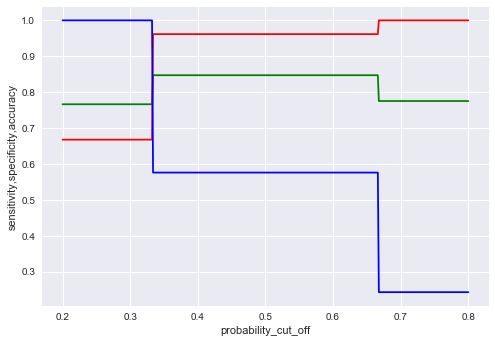

In [779]:
import matplotlib.pyplot as plt
plt.plot(probability, accuracy, color = 'green')
plt.plot(probability,sensitivity,color='red')
plt.plot(probability,specificity,color='blue')
plt.xlabel('probability_cut_off')
plt.ylabel('sensitivity,specificity,accuracy')
plt.show()

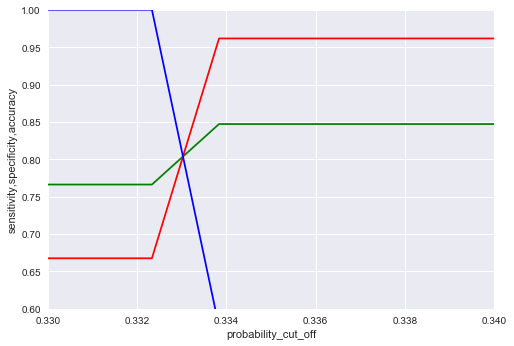

In [780]:
import matplotlib.pyplot as plt
plt.plot(probability, accuracy, color = 'green')
plt.plot(probability,sensitivity,color='red')
plt.plot(probability,specificity,color='blue')
plt.xlabel('probability_cut_off')
plt.ylabel('sensitivity,specificity,accuracy')
plt.axis([0.33,0.34,0.6,1])
plt.show()

In [781]:
    def CM_(t):
        return[confusion_matrix(y, pred(t))]

In [782]:
    def accuracy_(t):
        return[(CM(t)[0][0][0]+CM(t)[0][1][1])/(CM(t)[0][0][0]+CM(t)[0][0][1]+CM(t)[0][1][0]+CM(t)[0][1][1])]        

In [783]:
    def sensitivity_(t):
        return[CM(t)[0][1][1]/(CM(t)[0][1][0]+CM(t)[0][1][1])]

In [784]:
    def specificity_(t):
        return[CM(t)[0][0][0]/(CM(t)[0][0][0]+CM(t)[0][0][1])]

In [785]:
accuracy_(0.333)

[0.76618705035971224]

In [786]:
sensitivity_(0.333)


[0.6675191815856778]

In [787]:
specificity_(0.333)

[1.0]

At a probability cut off of 0.3325 the specificity is high i.e the no of individuals whose loan have not been sanctioned are identified correctly.The accuracy and sensitivity of the model is also ok.

We will now apply the model on test data

# Test Data

In [788]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df_test = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [789]:
df_test.Dependents.value_counts(normalize=True)

0     0.560224
2     0.165266
1     0.162465
3+    0.112045
Name: Dependents, dtype: float64

In [790]:
df_test.Dependents.fillna(value='3+',inplace=True)

In [791]:
df_test.Gender.value_counts(normalize=True)
df_test.Gender.fillna(value=df_test.Gender.mode()[0],inplace=True)
df_test.Gender.value_counts(normalize=True)

Male      0.809264
Female    0.190736
Name: Gender, dtype: float64

In [792]:
df_test.Self_Employed.fillna(value=df_test.Self_Employed.mode()[0],inplace=True)

In [793]:
normalrangeLoanAmount=df_test.LoanAmount[df_test.LoanAmount<df_test.LoanAmount.quantile(0.99)]
df_test.LoanAmount.fillna(value=normalrangeLoanAmount.mean(),inplace=True)

In [794]:
df_test.Loan_Amount_Term.value_counts(normalize=True)
df_test.Loan_Amount_Term.fillna(value=df_test.Loan_Amount_Term.mode()[0],inplace=True)

In [795]:
df_test.Credit_History.fillna(value=df_test.Credit_History.mode()[0],inplace=True)

In [796]:
df_test.Credit_History.fillna(value=df_test.Credit_History.mode()[0],inplace=True)

In [797]:
df_test.Property_Area.fillna(value=df_test.Property_Area.mode()[0],inplace=True)

In [798]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               367 non-null object
Married              367 non-null object
Dependents           367 non-null object
Education            367 non-null object
Self_Employed        367 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           367 non-null float64
Loan_Amount_Term     367 non-null float64
Credit_History       367 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [799]:
df_test['CombinedIncome']= df_test.ApplicantIncome+df_test.CoapplicantIncome

In [800]:
df_test.Gender.head()

0    Male
1    Male
2    Male
3    Male
4    Male
Name: Gender, dtype: object

In [801]:
import pandas as pd
Gen_t = pd.get_dummies(df_test.Gender)
Gen_t = Gen_t['Female']
Gen_t = Gen_t.to_frame()
Gen_t.columns = ['Gender']

In [802]:
Mar_t= pd.get_dummies(df_test.Married)
Mar_t = Mar_t['Yes']
Mar_t = Mar_t.to_frame()
Mar_t.columns = ['Married']

In [803]:
Dep_t = pd.get_dummies(df_test.Dependents)
Dep_0 = Dep_t['0']
Dep_1 = Dep_t['1']
Dep_2 = Dep_t['2']
import pandas as pd
Dep_t = pd.concat((Dep_0, Dep_1, Dep_2), axis=1)

In [804]:
Edu_t= pd.get_dummies(df_test.Education)
Edu_t = Edu_t['Graduate']
Edu_t = Edu_t.to_frame()

In [805]:
SE_t= pd.get_dummies(df_test.Self_Employed)
SE_t = SE_t['Yes']
SE_t = SE_t.to_frame()
SE_t.columns = ['SE']

In [806]:
from sklearn.preprocessing import scale
ComInc_t = scale(df_test.CombinedIncome)
ComInc_t = pd.DataFrame(ComInc_t)
ComInc_t.columns = ['CI']

C:\Users\Administrator\Desktop\Python\New folder\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


In [807]:
LA_t = scale(df_test.LoanAmount)
LA_t = pd.DataFrame(LA_t)
LA_t.columns = ['LA']

In [808]:
LAT_t = scale(df_test.Loan_Amount_Term)
LAT_t = pd.DataFrame(LAT_t)
LAT_t.columns = ['LAT']

In [809]:
CH_t = df_test.Credit_History
CH_t = CH_t.to_frame()
CH_t.columns = ['CH']

In [810]:
PA_t = df_test[['Property_Area']]
PA_t[df_test.Property_Area == 'Rural'] = 0
PA_t[df_test.Property_Area == 'Semiurban'] = 1
PA_t[df_test.Property_Area == 'Urban'] = 2
PA_t = pd.get_dummies(PA_t)
PA_t = pd.concat((PA_t.Property_Area_0, PA_t.Property_Area_1),axis = 1)
PA_t.columns = ['Rural','SemiUrban']

C:\Users\Administrator\Desktop\Python\New folder\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Administrator\Desktop\Python\New folder\lib\site-packages\pandas\core\frame.py:2444: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc._setitem_with_indexer(indexer, value)
C:\Users\Administrator\Desktop\Python\New folder\lib\site-packages\pandas\core\frame.py:2424: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.

In [811]:
X_t = pd.concat((Gen_t.reset_index(drop=True), Mar_t.reset_index(drop=True), Dep_t.reset_index(drop=True), Edu_t.reset_index(drop=True), SE_t.reset_index(drop=True), ComInc_t.reset_index(drop=True), LA_t.reset_index(drop=True), LAT_t.reset_index(drop=True), CH_t.reset_index(drop=True), PA_t.reset_index(drop=True)),axis=1)


Now the test data is ready. We can now apply the knn model we have created. 

In [812]:
prob_t = knn3.predict_proba(X_t)

In [813]:
pred_t = knn3.predict(X_t)

In [814]:
probN_t= prob_t[:,0]

In [815]:
def pred(i):
        return['Y' if i<0.333 else 'N' for i in probN_t]

In [816]:
test_prediction = pd.DataFrame(pred(probN_t))

In [817]:
test_prediction.columns = ['Test_prediction']